## EDA: Hotel booking demand

https://www.kaggle.com/jessemostipak/hotel-booking-demand

Zbiór z Kaggle opisujący dwa hotele w Portugalii: jeden miejski (Lizbona), drugi w typie kurortu (region Algarve).
    
Rezerwacje w okresie od 1 lipca 2015 do 31 sierpnia 2017 roku.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.options.mode.chained_assignment = None 

In [2]:
df = pd.read_csv("hotel_bookings.csv")

In [3]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02-07-15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02-07-15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03-07-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-17
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-17
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-17
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-17


In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Ile jest wierszy, jakie są kolumny, gdzie są braki w danych?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

<table>
<thead>
  <tr>
    <th>Variable </th>
    <th> Description </th>
  </tr>
</thead>
<tbody>
  <tr>
    <td> adr </td>
    <td> Average Daily Rate, calculated by dividing the sum of all lodging transactions by the total number of staying nights </td>
  </tr>
  <tr>
    <td> adults </td>
    <td> Number of adults </td>
  </tr>
  <tr>
    <td> agent </td>
    <td> ID of the travel agency that made the booking </td>
  </tr>
  <tr>
    <td> arrival_date_week_number </td>
    <td> Week number of the arrival date </td>
  </tr>
  <tr>
    <td> booking_changes </td>
    <td> Number of changes/amendments made to the booking from the moment the&nbsp;&nbsp;booking was entered on the Property Management System (PMS) until the&nbsp;&nbsp;moment of check-in or cancellation </td>
  </tr>
  <tr>
    <td> country </td>
    <td> Country of origin </td>
  </tr>
  <tr>
    <td> customer_type </td>
    <td> Type of booking, assuming one of four categories: Contract - when the&nbsp;&nbsp;booking has an allotment or other type of contract associated to it;&nbsp;&nbsp;Group - when the booking is associated to a group; Transient - when the&nbsp;&nbsp;booking is not part of a group or contract, and is not associated to&nbsp;&nbsp;other transient booking; Transient-party - when the booking is transient&nbsp;&nbsp;but is associated to at least another transient booking </td>
  </tr>
  <tr>
    <td> hotel </td>
    <td> Type of hotel </td>
  </tr>
  <tr>
    <td> lead_time </td>
    <td> Number of days that elapsed between the entering date of the booking into the PMS and the arrival date </td>
  </tr>
  <tr>
    <td> market_segment </td>
    <td> Market segment designation. In categories, the term "TA" means "Travel Agents" and "TO" means "Tour Operators" </td>
  </tr>
  <tr>
    <td> previous_bookings_not_canceled </td>
    <td> Number of previous bookings not canceled by the customer prior to the current booking </td>
  </tr>
  <tr>
    <td> previous_cancellations </td>
    <td> Number of previous bookings that were canceled by the customer prior to the current booking </td>
  </tr>
  <tr>
    <td> required_car_parking_spaces </td>
    <td> Number of car parking spaces required by the customer </td>
  </tr>
  <tr>
    <td> reserved_room_type </td>
    <td> Code of room type reserved. Code is presented instead of designation for anonymity reasons </td>
  </tr>
  <tr>
    <td> stays_in_week_nights </td>
    <td> Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel </td>
  </tr>
  <tr>
    <td> stays_in_weekend_nights </td>
    <td> Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel </td>
  </tr>
  <tr>
    <td> total_of_special_requests </td>
    <td> Number of special requests made by the customer (e.g. twin bed or high floor) </td>
  </tr>
</tbody>
</table>

In [6]:
nan_replacements = {"children:": 0, "country": "Unknown", "agent": 0, "company": 0}
hotels_df = df.fillna(nan_replacements)

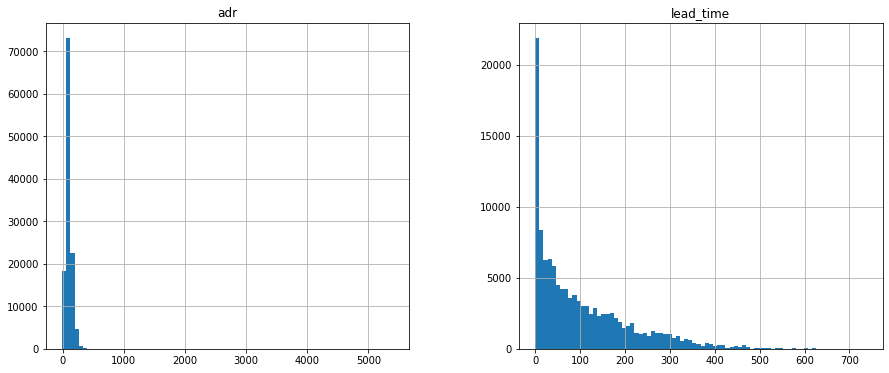

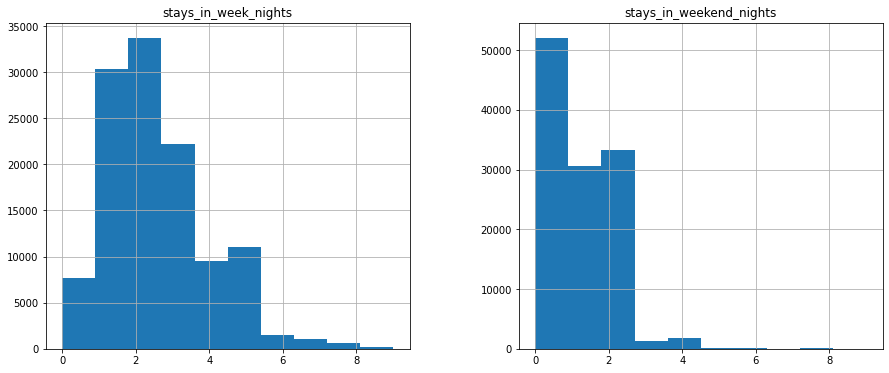

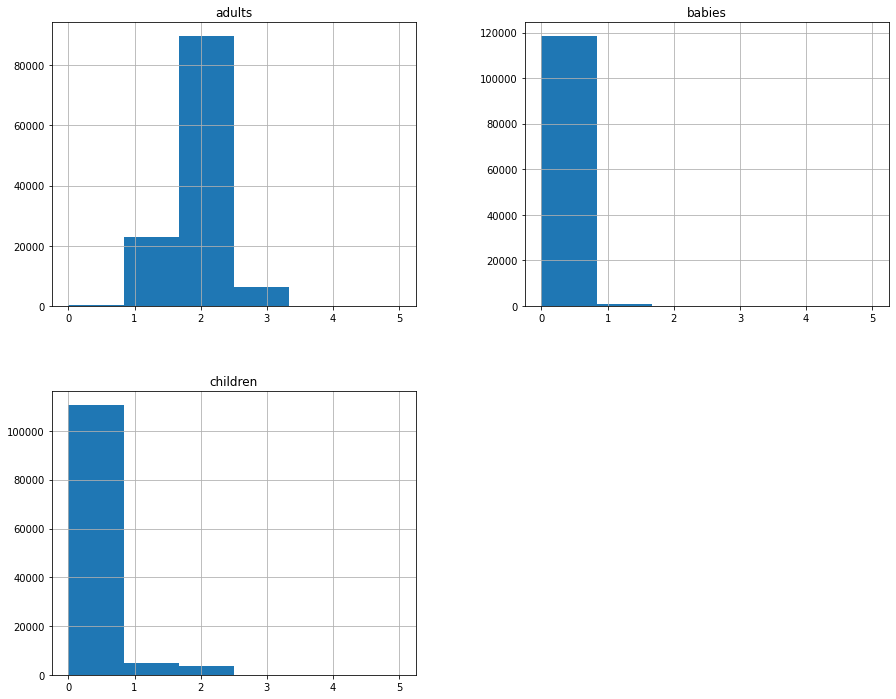

In [7]:
hotels_df[['lead_time', 'adr']].hist(figsize=(15,6), bins=80)
hotels_df[['stays_in_weekend_nights', 'stays_in_week_nights']].hist(figsize=(15,6), bins=10, range=(0,9))
hotels_df[['adults', 'children', 'babies']].hist(figsize=(15,12), bins=6, range=(0,5))
plt.show()

Jakiego typu są kolumny?

In [8]:
# 1.
{name: pd.api.types.is_numeric_dtype(hotels_df[name]) for name in hotels_df.columns}

{'hotel': False,
 'is_canceled': True,
 'lead_time': True,
 'arrival_date_year': True,
 'arrival_date_month': False,
 'arrival_date_week_number': True,
 'arrival_date_day_of_month': True,
 'stays_in_weekend_nights': True,
 'stays_in_week_nights': True,
 'adults': True,
 'children': True,
 'babies': True,
 'meal': False,
 'country': False,
 'market_segment': False,
 'distribution_channel': False,
 'is_repeated_guest': True,
 'previous_cancellations': True,
 'previous_bookings_not_canceled': True,
 'reserved_room_type': False,
 'assigned_room_type': False,
 'booking_changes': True,
 'deposit_type': False,
 'agent': True,
 'company': True,
 'days_in_waiting_list': True,
 'customer_type': False,
 'adr': True,
 'required_car_parking_spaces': True,
 'total_of_special_requests': True,
 'reservation_status': False,
 'reservation_status_date': False}

In [9]:
# ile jest kolumn numerycznych?
np.sum([pd.api.types.is_numeric_dtype(hotels_df[name]) for name in hotels_df.columns])

20

In [10]:
# 2.
hotels_df.select_dtypes(include=[np.number])

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0,0.00,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0,0.00,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,0,75.00,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,0,75.00,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,394.0,0.0,0,96.14,0,0
119386,0,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,9.0,0.0,0,225.43,0,2
119387,0,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,9.0,0.0,0,157.71,0,4
119388,0,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,89.0,0.0,0,104.40,0,0


### Zadanie
Zmienna `lead_time` to która mówi o długości czasu pomiędzy rezerwacją a czasem pobytu w hotelu. Czy ma jakiś wpływ? 

? Sprawdź wpływ czasu realizacji zamówienia na anulacje, możesz podzielić obserwacje na 10 grup. 

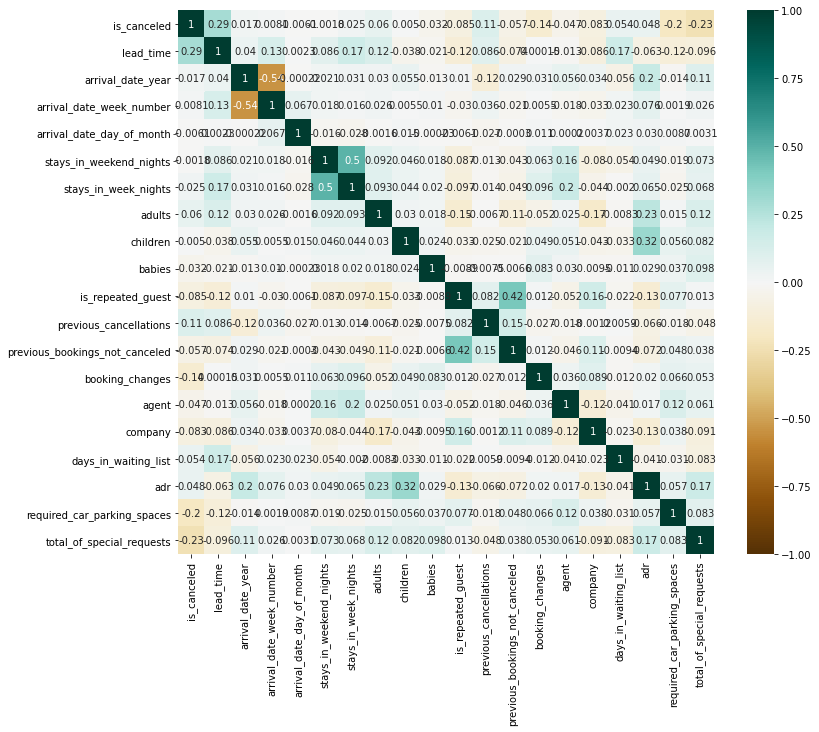

In [11]:
num_features = [name for name in df.columns if pd.api.types.is_numeric_dtype(hotels_df[name])]

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(hotels_df[num_features].corr(), annot=True, vmin=-1, vmax=1, cmap="BrBG")
plt.show()

### Jak często są odwoływane rezerwacje?


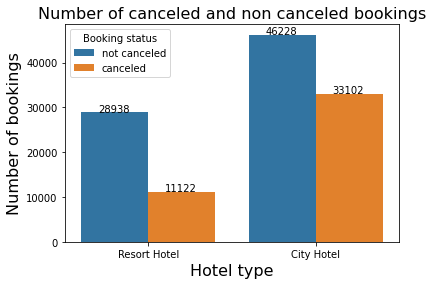

In [12]:
ax = sns.countplot(data = hotels_df, x = "hotel", hue = "is_canceled")
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+100))

plt.title("Number of canceled and non canceled bookings", fontsize=16)
plt.xlabel("Hotel type", fontsize=16)
plt.ylabel("Number of bookings", fontsize=16)
plt.legend(title = "Booking status", labels = ["not canceled", "canceled"])
plt.show()

### Wpływ typu depozytu na anulowanie rezerwacji

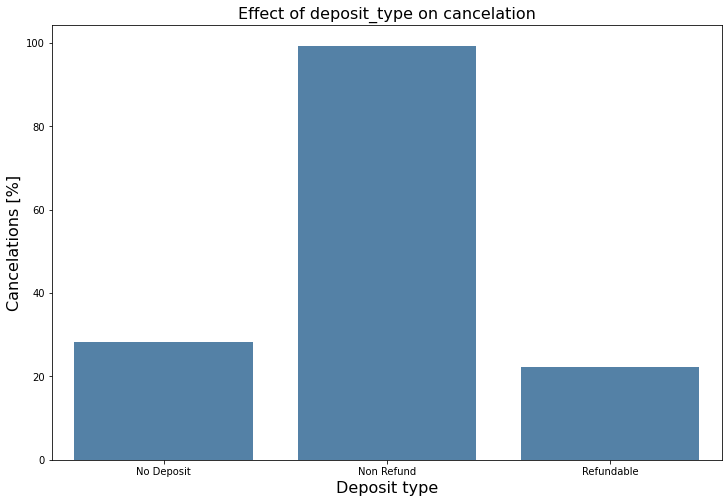

In [13]:
deposit_cancel_data = hotels_df.groupby("deposit_type")["is_canceled"].describe()

plt.figure(figsize=(12, 8))
sns.barplot(x=deposit_cancel_data.index, y=deposit_cancel_data["mean"] * 100, color = "steelblue")
plt.title("Effect of deposit_type on cancelation", fontsize=16)
plt.xlabel("Deposit type", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.show()

In [14]:
hotels_df["deposit_type"].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

This variable can assume three categories:
- No Deposit – no deposit was made;
- Non Refund – a deposit was made in the value of the total stay cost;
- Refundable – a deposit was made with a value under the total cost of stay."


In [15]:
hotels_df[hotels_df["deposit_type"] == "Non Refund"].groupby(['hotel', 'is_canceled']).size().reset_index()

,hotel,is_canceled,0
0,City Hotel,0,24
1,City Hotel,1,12844
2,Resort Hotel,0,69
3,Resort Hotel,1,1650


### Jak zmienia się liczba rezerwacji w ciągu roku?

In [16]:
bookings_monthly = hotels_df[["hotel", "arrival_date_month", "arrival_date_year", "is_canceled", "adr"]]
ordered_months = ["January", "February", "March", "April", "May", "June", 
                  "July", "August", "September", "October", "November", "December"]
bookings_monthly.loc[:,"arrival_date_month"] = pd.Categorical(bookings_monthly["arrival_date_month"], categories=ordered_months, ordered=True)

In [17]:
bookings_monthly = bookings_monthly.groupby(["hotel", "arrival_date_month", "is_canceled"]).size().reset_index(name='counts')
#w ramce dane za lipiec i sierpień występują 3 razy, za pozostałe miesiące - 2 razy
bookings_monthly.loc[(bookings_monthly["arrival_date_month"] == "July") | (bookings_monthly["arrival_date_month"]  == "August"),
                    "counts"] /= 3
bookings_monthly.loc[~((bookings_monthly["arrival_date_month"] == "July") | (bookings_monthly["arrival_date_month"]  == "August")),
                    "counts"] /= 2

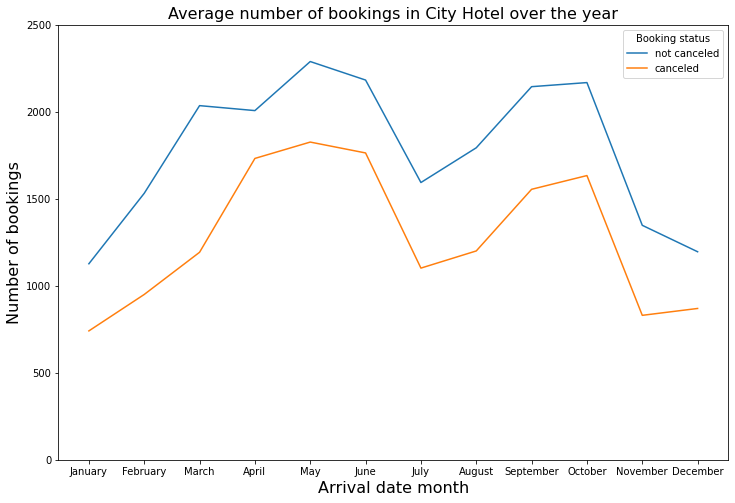

In [18]:
plt.figure(figsize=(12, 8))
plt.ylim(0, 2500)
sns.lineplot(data=bookings_monthly[bookings_monthly["hotel"] == "City Hotel"], x = "arrival_date_month", y="counts", hue="is_canceled")
plt.legend(title = "Booking status", labels = ["not canceled", "canceled"])
plt.title("Average number of bookings in City Hotel over the year", fontsize=16)
plt.xlabel("Arrival date month", fontsize=16)
plt.ylabel("Number of bookings", fontsize=16)
plt.show()

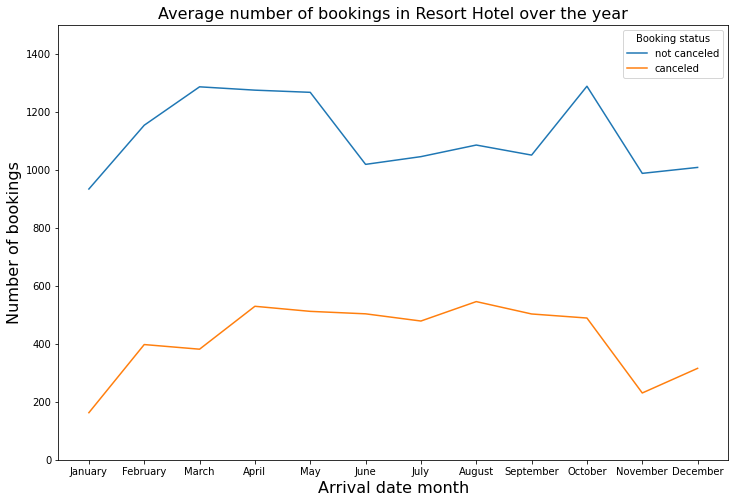

In [19]:
plt.figure(figsize=(12, 8))
plt.ylim(0, 1500)
sns.lineplot(data=bookings_monthly[bookings_monthly["hotel"] == "Resort Hotel"], x = "arrival_date_month", y="counts", hue="is_canceled")
plt.legend(title = "Booking status", labels = ["not canceled", "canceled"])
plt.title("Average number of bookings in Resort Hotel over the year", fontsize=16)
plt.xlabel("Arrival date month", fontsize=16)
plt.ylabel("Number of bookings", fontsize=16)
plt.show()

In [20]:
df.country.value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
HND        1
MRT        1
AIA        1
KIR        1
MMR        1
Name: country, Length: 177, dtype: int64

### Kraj pochodzenia gości hotelowych

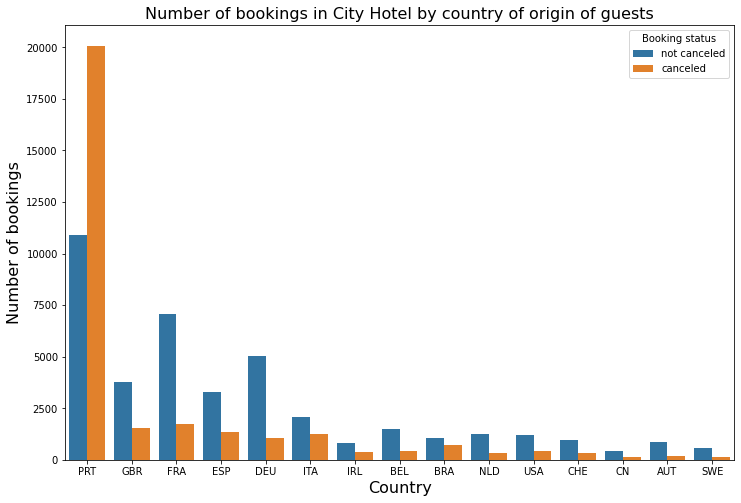

In [21]:
plt.figure(figsize=(12, 8))
sns.countplot(data = hotels_df[hotels_df["hotel"] == "City Hotel"], x = "country", hue = "is_canceled", 
              order = pd.value_counts(hotels_df['country']).iloc[:15].index)
plt.legend(title = "Booking status", labels = ["not canceled", "canceled"])
plt.title("Number of bookings in City Hotel by country of origin of guests", fontsize=16)
plt.xlabel("Country", fontsize=16)
plt.ylabel("Number of bookings", fontsize=16)
plt.show()

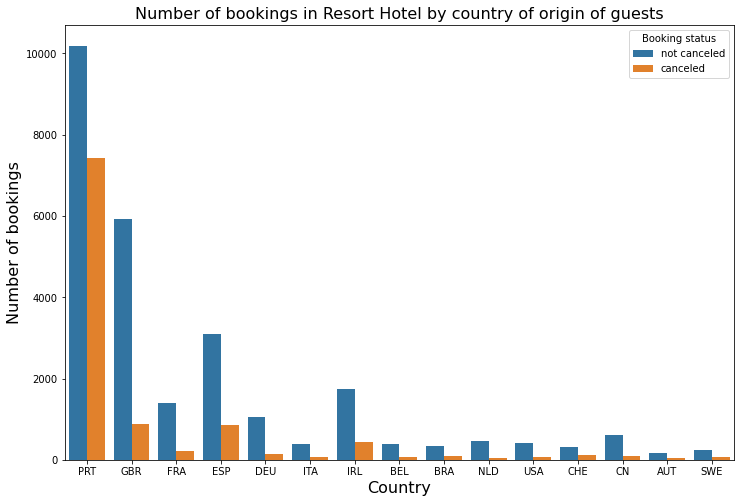

In [22]:
plt.figure(figsize=(12, 8))
sns.countplot(data = hotels_df[hotels_df["hotel"] == "Resort Hotel"], x = "country", hue = "is_canceled", 
              order = pd.value_counts(hotels_df['country']).iloc[:15].index)
plt.legend(title = "Booking status", labels = ["not canceled", "canceled"])
plt.title("Number of bookings in Resort Hotel by country of origin of guests", fontsize=16)
plt.xlabel("Country", fontsize=16)
plt.ylabel("Number of bookings", fontsize=16)
plt.show()

### Długość pobytu a liczba rezerwacji

In [23]:
res = hotels_df.loc[(hotels_df["hotel"] == "Resort Hotel")]
city = hotels_df.loc[(hotels_df["hotel"] == "City Hotel")]

In [24]:
res["total_nights"] = res["stays_in_weekend_nights"] + res["stays_in_week_nights"]
city["total_nights"] = city["stays_in_weekend_nights"] + city["stays_in_week_nights"]
res_plot = res.groupby(['total_nights', "is_canceled"]).size().reset_index()
city_plot = city.groupby(['total_nights', "is_canceled"]).size().reset_index()
res_plot

,total_nights,is_canceled,0
0,0,0,372
1,0,1,12
2,1,0,6580
3,1,1,1168
4,2,0,4488
...,...,...,...
62,46,0,1
63,56,0,1
64,56,1,1
65,60,0,1


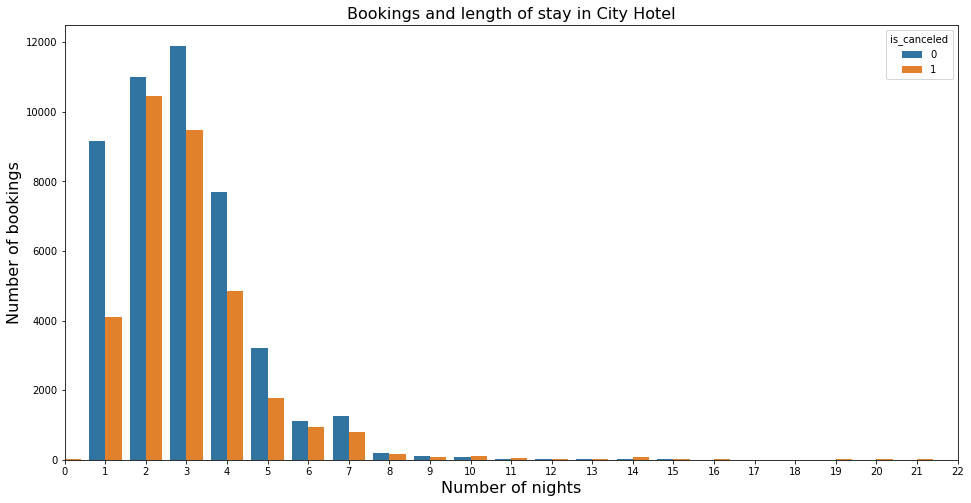

In [25]:
plt.figure(figsize=(16, 8))
sns.barplot(x = "total_nights", y = 0, hue="is_canceled", data=city_plot)
plt.title("Bookings and length of stay in City Hotel", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Number of bookings", fontsize=16)
plt.xlim(0,22)
plt.show()

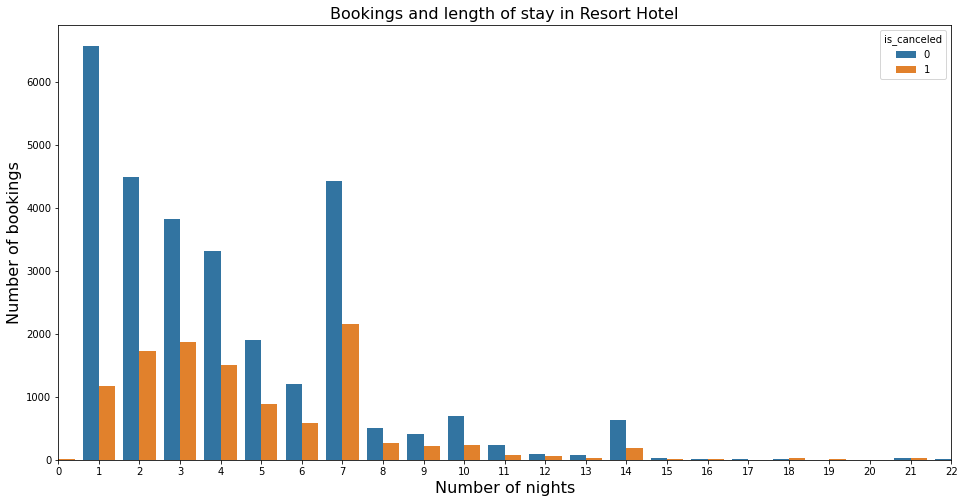

In [26]:
plt.figure(figsize=(16, 8))
sns.barplot(x = "total_nights", y = 0, hue="is_canceled", data=res_plot)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Guests [%]", fontsize=16)
plt.xlim(0,22)
plt.title("Bookings and length of stay in Resort Hotel", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Number of bookings", fontsize=16)
plt.show()

### Czy przypisanie do innego typu pokoju ma znaczący wpływ na anulowanie rezerwacji?

In [27]:
hotels_df.loc[(hotels_df["reserved_room_type"] != hotels_df["assigned_room_type"]), "is_canceled"].mean()

0.05376416169471073

In [28]:
hotels_df.loc[(hotels_df["reserved_room_type"] == hotels_df["assigned_room_type"]), "is_canceled"].mean()

0.41562891847654415

Raczej nie bardzo.

### Czy wyjazdy z dziećmi są częściej odwoływane?


In [29]:
hotels_df.loc[hotels_df["babies"] + hotels_df["children"] > 0, "is_canceled"].mean()

0.3492284612087441

In [30]:
hotels_df.loc[hotels_df["babies"] + hotels_df["children"] == 0, "is_canceled"].mean()

0.3721900158104203

Nie.

### Czy ponowni goście są mniej skłonni do odwołania rezerwacji?

In [31]:
hotels_df.loc[hotels_df["is_repeated_guest"] == 1, "is_canceled"].mean()

0.14488188976377953

In [32]:
hotels_df.loc[hotels_df["is_repeated_guest"] == 0, "is_canceled"].mean()

0.3778508392455442

Tak

### Zadanie
Sprawdź czy zmienna `previous_bookings_not_canceled` ma wpływ na anulowanie rezerwacji. Czy są jakieś inne zmienne, które mogą być zależne od `previous_bookings_not_canceled`.

? Popatrz na macierz korelacji.

## autoEDA: pandas-profiling

`pip install pandas-profiling[notebook]`

- https://github.com/pandas-profiling/pandas-profiling
- https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd

In [33]:
from pandas_profiling import ProfileReport

In [34]:
profile = ProfileReport(df.sample(frac=0.1), title="Pandas Profiling Report", explorative=True)

In [35]:
profile.to_widgets()

Generate report structure: 100%|██████████| 1/1 [00:10<00:00, 10.25s/it]


In [36]:
profile.to_file("report1.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 20.85it/s]


## zajawka: modelowanie predykcyjne

`pip install lazypredict`

- https://github.com/shankarpandala/lazypredict
- https://lazypredict.readthedocs.io/en/latest

In [37]:
from lazypredict.Supervised import LazyClassifier

C:\Users\hbani\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [38]:
df_small = hotels_df.select_dtypes(include=[np.number]).sample(frac=0.1)

X = df_small.drop(["is_canceled"], axis=1)
y = df_small.is_canceled

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)

In [40]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:34<00:00,  1.19s/it]


In [41]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.81               0.78     0.78      0.81   
LGBMClassifier                     0.81               0.78     0.78      0.81   
RandomForestClassifier             0.81               0.77     0.77      0.80   
ExtraTreesClassifier               0.81               0.77     0.77      0.80   
BaggingClassifier                  0.79               0.76     0.76      0.79   
AdaBoostClassifier                 0.78               0.74     0.74      0.77   
DecisionTreeClassifier             0.75               0.74     0.74      0.75   
NuSVC                              0.77               0.73     0.73      0.76   
KNeighborsClassifier               0.76               0.73     0.73      0.75   
ExtraTreeClassifier                0.74               0.72     0.72      0.74   
LabelSpreading              